In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [14]:
data = pd.read_csv("Orange_Telecom_Churn_Data.csv")
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
#Removendo colunas
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [16]:
lb = LabelBinarizer()
for d in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[d] = lb.fit_transform(data[d])
data.shape

(5000, 18)

In [27]:
x_data = data.copy()
y_data = x_data.pop('churned')

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_data, y_data)

#knn.score(x_data, y_data)
pred = knn.predict(x_data)

In [26]:
def accuracy(real, pred):
    return sum(real == pred) / float(real.shape[0])

In [28]:
accuracy(y_data, pred)

0.9164

In [8]:
k = []
accuracy = []

for i in range(1, 20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    k.append(i)

    knn.fit(x_data, y_data)

    accuracy.append(knn.score(x_data, y_data))
    
    


<function matplotlib.pyplot.show>

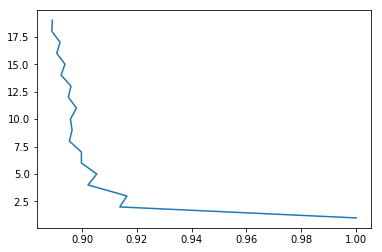

In [157]:
plt.plot(accuracy, k)
plt.show